In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 10 14:35:30 2018

@author: wangj
"""
%matplotlib inline

from package.hamiltonian import simplePureHamiltonian
from package.PPFtfim import tfim
import matplotlib.pyplot as plt
import numpy as np

L=16
STEPS=32
dt=0.5

M=simplePureHamiltonian(4*L,1.0,.8, 0)
#plt.matshow(M)
#plt.colorbar()
#plt.show()

t=tfim(M)

#AABB=t.AABBt0
#plt.matshow(AABB)
#plt.colorbar()
#plt.show()

swk=t.Swk(L,3*L,dt,STEPS)

cnt=t.correlator_dynamics_sector(L,3*L,dt,STEPS)


'''
i=L
j=3*L
tSteps=STEPS
sec1=t.correlator_dynamics_sector_AABB(i,j,dt,tSteps)

sec2=t.correlator_dynamics_sector(i,j,dt,tSteps)
print(np.max(np.abs(sec1-sec2)))
'''


time spent in sector
4.60272216796875
time spent in sector
4.9999778270721436


'\ni=L\nj=3*L\ntSteps=STEPS\nsec1=t.correlator_dynamics_sector_AABB(i,j,dt,tSteps)\n\nsec2=t.correlator_dynamics_sector(i,j,dt,tSteps)\nprint(np.max(np.abs(sec1-sec2)))\n'

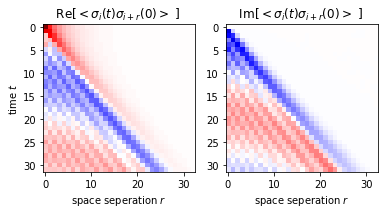

In [2]:
plt.set_cmap('seismic')
plt.subplot(121)

plt.imshow(np.real(cnt))
plt.clim(-1,1)
plt.xlabel("space seperation $r$")
plt.ylabel("time $t$")
plt.title(" Re[$< \sigma_i(t)\sigma_{i+r}(0) > $ ]  ")

plt.subplot(122)
plt.imshow(np.imag(cnt))
plt.clim(-1,1)
plt.xlabel("space seperation $r$")
plt.title(" Im[$< \sigma_i(t)\sigma_{i+r}(0) > $ ]  ")


plt.show()

<Figure size 720x360 with 0 Axes>

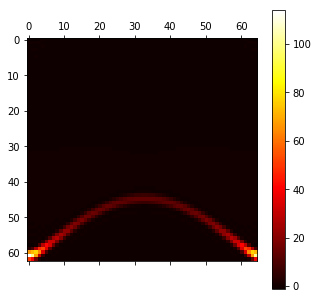

<Figure size 3600x2160 with 0 Axes>

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.set_cmap('hot')
plt.matshow(swk.real)
plt.colorbar()
plt.figure(figsize=(50,30))
plt.show()

In [4]:
z=[]
for i in range(300):
    n=L*2
    z.append(t.correlator_dynamics(n,i*0.1,n))

In [5]:
z1=[]
for i in range(300):
    n=L*2
    z1.append(t.correlator_dynamics(n,i*0.1,n+1))

Text(0.5,1,'$<\\sigma_i(t) \\sigma_i(0)>$')

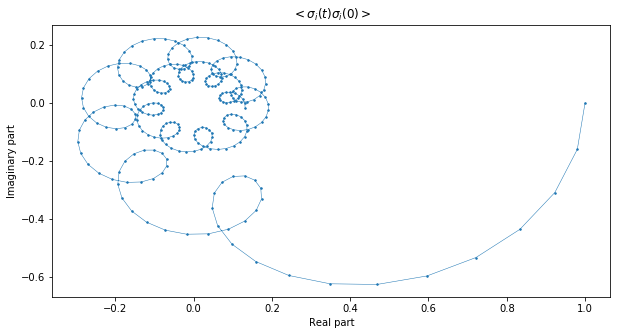

In [6]:
plt.plot(np.real(z),np.imag(z),'-o',linewidth=.5, markersize=1.5)
#plt.plot(np.real(z1),np.imag(z1),'b.')
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.title("$<\sigma_i(t) \sigma_i(0)>$")


# multiple bands

In [249]:
%matplotlib inline

from package.hamiltonian import simplePureHamiltonian
from package.PPFtfim import tfim
import matplotlib.pyplot as plt
import numpy as np

L=16
STEPS=64
dt=0.5

N=4*L
M=np.zeros((N,N))
for i in range(N):
    M[i,i]=2
for i in range(N-1):
    if(i%2==0):
        M[i,i+1]=0.4
    else:
        M[i,i+1]=1.4

for i in range(N-2):
    M[i,i+2]=0.0
    
print(M)

[[2.  0.4 0.  ... 0.  0.  0. ]
 [0.  2.  1.4 ... 0.  0.  0. ]
 [0.  0.  2.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 2.  1.4 0. ]
 [0.  0.  0.  ... 0.  2.  0.4]
 [0.  0.  0.  ... 0.  0.  2. ]]


In [250]:

t_band=tfim(M)


swk=t_band.Swk(L,3*L,dt,STEPS)

cnt=t_band.correlator_dynamics_sector(L,3*L,dt,STEPS)

time spent in sector
9.451523303985596
time spent in sector
9.223294973373413


/home/jian/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


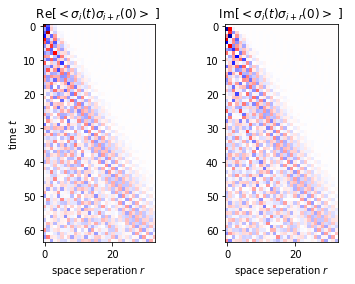

In [251]:
plt.set_cmap('seismic')
plt.subplot(121)

plt.imshow(np.real(cnt))
plt.clim(-1,1)
plt.xlabel("space seperation $r$")
plt.ylabel("time $t$")
plt.title(" Re[$< \sigma_i(t)\sigma_{i+r}(0) > $ ]  ")

plt.subplot(122)
plt.imshow(np.imag(cnt))
plt.clim(-1,1)
plt.xlabel("space seperation $r$")
plt.title(" Im[$< \sigma_i(t)\sigma_{i+r}(0) > $ ]  ")


plt.show()

<Figure size 720x360 with 0 Axes>

/home/jian/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


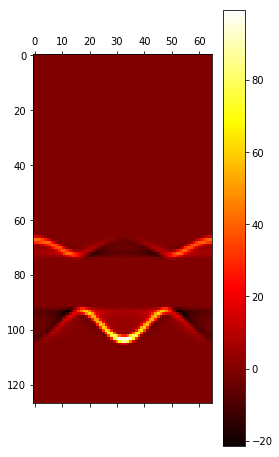

<Figure size 3600x2160 with 0 Axes>

In [252]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.set_cmap('hot')



plt.matshow((swk))
plt.colorbar()
plt.figure(figsize=(50,30))
plt.show()

In [254]:
sss=swk

In [255]:
sss[sss<0]=-sss[sss<0]

/home/jian/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


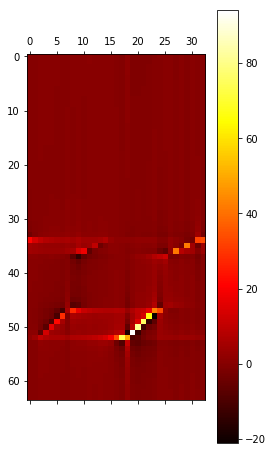

<Figure size 3600x2160 with 0 Axes>

In [260]:
%matplotlib inline


plt.matshow(np.fft.fft2(cnt))
plt.colorbar()
plt.figure(figsize=(50,30))
plt.show()